In [ ]:
import gdown
import pandas as pd
import numpy as np
path = '/content/drive/MyDrive/Классификация_аудиозвонков_на_целевые_и_нецелевые/Павелецкая_ЖК_«Павелецкая_сити».csv'

In [ ]:
df = pd.read_csv(path, delimiter = ';', on_bad_lines = 'warn', header = 4)

Skipping line 18: expected 74 fields, saw 76
Skipping line 21: expected 74 fields, saw 82
Skipping line 160: expected 74 fields, saw 76
Skipping line 432: expected 74 fields, saw 78
Skipping line 673: expected 74 fields, saw 76
Skipping line 739: expected 74 fields, saw 78
Skipping line 3403: expected 74 fields, saw 76
Skipping line 5181: expected 74 fields, saw 78
Skipping line 5183: expected 74 fields, saw 78



In [ ]:
df

,Статус,Тип,Дата и время,Номер абонента,Длительность ожидания ответа,Сотрудник,Рекламная кампания,Номер обращения,Длительность звонка,Теги,...,Чистая длительность разговора,Полная длительность ожидания,Идентификатор звонка во внешней системе,Расширенная UTM-метка Source,Расширенная UTM-метка Campaign,Расширенная UTM-метка Medium,Расширенная UTM-метка Content,Расширенная UTM-метка Term,Расширенная UTM-метка Referrer,Расширенная UTM-метка Expid
0,Потерянный,Автоперезвон по заявкам,2023-07-31 20:35:42,7.984703e+10,00:00:37,Обратный звонок (SIP<1),Media108 | Павелецкая Сити | direct | Яндекс.Д...,3.0,00:00:37,Не обработано - Нецелевой контакт,...,00:00:00,00:00:37,NaN,yandex,m108_pavcity_brand_net_mmo|88281925,cpc,id|44896430327_44896430327|cid|88281925|gid|52...,жк павелецкая сити 3 очередь,NaN,NaN
1,Принятый,Аналитика,2023-07-31 19:52:57,7.905524e+10,00:00:02,74955141111,MRGroup | Павелецкая Сити | seo | Google Поиск,1.0,00:04:06,Целевой_М108,...,00:04:04,00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Потерянный,Автоперезвон по заявкам,2023-07-31 19:21:06,7.999348e+10,00:00:36,Обратный звонок (SIP<1),Media108 | Павелецкая Сити | direct | Яндекс.Д...,63.0,00:00:36,Не обработано - Нецелевой контакт,...,00:00:00,00:00:36,NaN,yandex,m108_pavcity_brand_net_mmo|88281925,cpc,id|44896430393_44896430393|cid|88281925|gid|52...,павелецкая сити 3 и 4 очереди,NaN,NaN
3,Принятый,Автоперезвон по заявкам,2023-07-31 19:18:04,7.999348e+10,00:00:40,Обратный звонок (SIP<1),Media108 | Павелецкая Сити | direct | Яндекс.Д...,60.0,00:00:45,NaN,...,00:00:05,00:00:40,NaN,yandex,m108_pavcity_brand_net_mmo|88281925,cpc,id|44896430393_44896430393|cid|88281925|gid|52...,павелецкая сити 3 и 4 очереди,NaN,NaN
4,Принятый,Динамический коллтрекинг,2023-07-31 19:16:16,7.903720e+10,00:00:01,74955141111,Media108 | Павелецкая Сити | direct | Яндекс.Д...,9.0,00:05:08,NaN,...,00:05:07,00:00:01,NaN,yandex,m108_pavcity_brand_search_mmo|87584869,cpc,id|44890473306_44890473306|cid|87584869|gid|52...,жк павелецкая сити,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Принятый,Аналитика,2023-05-01 14:15:40,7.903745e+10,00:00:01,SIP URI,Artics | Павелецкая Сити | cpa | reffection,1.0,00:07:49,NaN,...,00:07:48,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9314,Принятый,Аналитика,2023-05-01 13:54:40,7.926336e+10,00:00:01,SIP URI,Artics | Павелецкая Сити | xml | yandex.realty.ru,1.0,00:00:42,NaN,...,00:00:41,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9315,Принятый,Аналитика,2023-05-01 12:24:40,7.977520e+10,00:00:01,74955141111,Artics | Павелецкая Сити | maps | Яндекс.Карты,1.0,00:05:21,NaN,...,00:05:20,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9316,Принятый,Аналитика,2023-05-01 10:48:24,7.705526e+10,00:00:03,74955141111,MRGroup | Павелецкая Сити | direct | Яндекс.Ди...,1.0,00:00:18,Нецелевой контакт,...,00:00:15,00:00:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2 = df.copy()

In [ ]:
df2 = df2.loc[363 : 1446]
df2 = df2.replace('Не обработано - Нецелевой контакт', np.NaN)
df2 = df2.replace('Не обработано', np.NaN)
df2 = df2.replace('Обработано - Нецелевой контакт', np.NaN)
df2 = df2.replace('Обработано - Нецелевой контакт - Целевой_М108', np.NaN)
df2 = df2.dropna(subset = ['Теги'])

In [ ]:
df2.Теги.unique()

array(['Целевой_М108', 'Нецелевой контакт',
       'Нецелевой контакт - Целевой_М108', 'Нецелевой',
       'Коммерция_целевой_М108'], dtype=object)

In [ ]:
df2.loc[df2.Теги == 'Целевой_М108', 'Теги'] = 'Целевой'
df2.loc[df2.Теги == 'Нецелевой контакт - Целевой_М108', 'Теги'] = 'Целевой'
df2.loc[df2.Теги == 'Коммерция_целевой_М108', 'Теги'] = 'Целевой'
df2.loc[df2.Теги == 'Нецелевой контакт', 'Теги'] = 'Не целевой'
df2.loc[df2.Теги == 'Нецелевой', 'Теги'] = 'Не целевой'

In [ ]:
df_calls = df2.reset_index(drop = True)

In [ ]:
print(df_calls.Теги.unique())
print(df_calls.Теги.describe())

['Целевой' 'Не целевой']
count         524
unique          2
top       Целевой
freq          301
Name: Теги, dtype: object


In [ ]:
df_calls

,Статус,Тип,Дата и время,Номер абонента,Длительность ожидания ответа,Сотрудник,Рекламная кампания,Номер обращения,Длительность звонка,Теги,...,Чистая длительность разговора,Полная длительность ожидания,Идентификатор звонка во внешней системе,Расширенная UTM-метка Source,Расширенная UTM-метка Campaign,Расширенная UTM-метка Medium,Расширенная UTM-метка Content,Расширенная UTM-метка Term,Расширенная UTM-метка Referrer,Расширенная UTM-метка Expid
0,Принятый,Аналитика,2023-07-20 11:43:08,7.916646e+10,00:00:01,SIP URI,Media108 | Павелецкая Сити | cpa | Roomberry,1.0,00:07:09,Целевой,...,00:07:08,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Принятый,Аналитика,2023-07-20 10:49:37,7.963417e+10,00:00:02,74955141111,MRGroup | Павелецкая Сити | direct | Яндекс.Ди...,3.0,00:00:06,Не целевой,...,00:00:04,00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Принятый,Автоперезвон по заявкам,2023-07-20 10:39:51,7.977480e+10,00:00:39,Обратный звонок (SIP<1),Media108 | Павелецкая Сити | direct | Яндекс.Д...,2.0,00:42:51,Целевой,...,00:42:12,00:00:39,NaN,yandex,m108_pavelcity_brand_search_mmo|87584869,cpc,id|44890473407_44890473407|cid|87584869|gid|52...,павелецкий сити,NaN,NaN
3,Принятый,Звонки из VK Ads,2023-07-20 09:00:11,7.987297e+10,00:00:36,Обратный звонок (SIP<1),Media108 | Павелецкая Сити | social | VK Ads,2.0,00:01:24,Целевой,...,00:00:48,00:00:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Принятый,Аналитика,2023-07-19 21:28:07,7.909936e+10,00:00:01,74955141111,MRGroup | Павелецкая Сити | sms | СМС рассылка...,1.0,00:00:18,Не целевой,...,00:00:17,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,Принятый,Аналитика,2023-06-18 09:22:51,7.965181e+10,00:00:01,74955141111,MRGroup | Павелецкая Сити | offline | Брендиро...,1.0,00:00:25,Не целевой,...,00:00:24,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520,Принятый,Динамический коллтрекинг,2023-06-17 17:21:56,7.909469e+10,00:00:02,74955141111,Media108 | Павелецкая Сити | direct | Яндекс.Д...,2.0,00:00:09,Не целевой,...,00:00:07,00:00:02,NaN,yandex,competitors_general_call_rsy_mmo|88841292,cpc,id|45120041544_45120041544|cid|88841292|gid|52...,жк павелецкая сити мр групп,NaN,NaN
521,Принятый,Аналитика,2023-06-17 16:16:05,7.968030e+10,00:00:01,SIP URI,Media108 | Павелецкая Сити | media | Novostroy-m,1.0,00:06:40,Целевой,...,00:06:39,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522,Принятый,Аналитика,2023-06-17 13:44:16,7.906674e+10,00:00:01,SIP URI,Media108 | Павелецкая Сити | cpa | Roomberry,1.0,00:01:33,Целевой,...,00:01:32,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_calls.to_csv('df_Paveletskaya.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.utils import to_categorical
import os
import time
import random
import math
import pickle
import librosa
import zipfile
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
!unzip -qo '/content/drive/MyDrive/Классификация_аудиозвонков_на_целевые_и_нецелевые/Сalls_Paveletskaya.zip'

In [ ]:
!ls '/content/Call/nontargets'

nontargets.00000.au  nontargets.00050.au  nontargets.00100.au  nontargets.00150.au
nontargets.00001.au  nontargets.00051.au  nontargets.00101.au  nontargets.00151.au
nontargets.00002.au  nontargets.00052.au  nontargets.00102.au  nontargets.00152.au
nontargets.00003.au  nontargets.00053.au  nontargets.00103.au  nontargets.00153.au
nontargets.00004.au  nontargets.00054.au  nontargets.00104.au  nontargets.00154.au
nontargets.00005.au  nontargets.00055.au  nontargets.00105.au  nontargets.00155.au
nontargets.00006.au  nontargets.00056.au  nontargets.00106.au  nontargets.00156.au
nontargets.00007.au  nontargets.00057.au  nontargets.00107.au  nontargets.00157.au
nontargets.00008.au  nontargets.00058.au  nontargets.00108.au  nontargets.00158.au
nontargets.00009.au  nontargets.00059.au  nontargets.00109.au  nontargets.00159.au
nontargets.00010.au  nontargets.00060.au  nontargets.00110.au  nontargets.00160.au
nontargets.00011.au  nontargets.00061.au  nontargets.00111.au  nontargets.00161.au
nont

In [ ]:
!ls '/content/Call/targets'

targets.00000.au  targets.00040.au  targets.00080.au  targets.00120.au	targets.00160.au
targets.00001.au  targets.00041.au  targets.00081.au  targets.00121.au	targets.00161.au
targets.00002.au  targets.00042.au  targets.00082.au  targets.00122.au	targets.00162.au
targets.00003.au  targets.00043.au  targets.00083.au  targets.00123.au	targets.00163.au
targets.00004.au  targets.00044.au  targets.00084.au  targets.00124.au	targets.00164.au
targets.00005.au  targets.00045.au  targets.00085.au  targets.00125.au	targets.00165.au
targets.00006.au  targets.00046.au  targets.00086.au  targets.00126.au	targets.00166.au
targets.00007.au  targets.00047.au  targets.00087.au  targets.00127.au	targets.00167.au
targets.00008.au  targets.00048.au  targets.00088.au  targets.00128.au	targets.00168.au
targets.00009.au  targets.00049.au  targets.00089.au  targets.00129.au	targets.00169.au
targets.00010.au  targets.00050.au  targets.00090.au  targets.00130.au	targets.00170.au
targets.00011.au  targets.00051.

In [ ]:
# Установка констант

FILE_DIR = '/content/Call'                     # Папка с файлами датасета
CLASS_LIST = os.listdir(FILE_DIR)         # Список классов, порядок меток не определен!
CLASS_LIST.sort()                         # Сортировка списка классов для фиксации порядка меток
CLASS_COUNT = len(CLASS_LIST)             # Количество классов
CLASS_FILES = 200                         # Общее количество файлов в каждом классе
FILE_INDEX_TRAIN_SPLIT = 180               # Количество файлов каждого класса на основной набор
VALIDATION_SPLIT = 0.1                    # Доля проверочной выборки в основном наборе
DURATION_SEC = 200                         # Анализируемая длительность аудиосигнала
N_FFT = 4096                              # Размер окна преобразования Фурье для расчета спектра
HOP_LENGTH = 512                          # Объем данных для расчета одного набора признаков

In [ ]:
# Проверка списка классов
print(CLASS_LIST)

['nontargets', 'targets']


In [ ]:
# Функция параметризации аудио

def get_features(y,                     # волновое представление сигнала
                 sr,                    # частота дискретизации сигнала y
                 n_fft=N_FFT,           # размер скользящего окна БПФ
                 hop_length=HOP_LENGTH  # шаг скользящего окна БПФ
                 ):
    # Вычисление различных параметров (признаков) аудио

    # Среднеквадратическая амплитуда
    rmse = librosa.feature.rms(y=y, hop_length=hop_length)
    # Спектральный центроид
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    # Ширина полосы частот
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    # Спектральный спад частоты
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    # Пересечения нуля
    zcr = librosa.feature.zero_crossing_rate(y, hop_length=hop_length)
    # Мел-кепстральные коэффициенты
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    # Хромаграмма
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # Сборка параметров в общий список:
    # На один файл один усредненный вектор признаков
    features = {'rmse': rmse.mean(axis=1, keepdims=True),
                'spct': spec_cent.mean(axis=1, keepdims=True),
                'spbw': spec_bw.mean(axis=1, keepdims=True),
                'roff': rolloff.mean(axis=1, keepdims=True),
                'zcr' : zcr.mean(axis=1, keepdims=True),
                'mfcc': mfcc.mean(axis=1, keepdims=True),
                'stft': chroma_stft.mean(axis=1, keepdims=True)}

    return features

In [ ]:
# Функция объединения признаков в набор векторов

def stack_features(feat  # словарь признаков, отдельные векторы по ключу каждого признака
                   ):
    features = None
    for v in feat.values():
        features = np.vstack((features, v)) if features is not None else v

    return features.T

In [ ]:
# Функция формирования набора признаков и метки класса для аудиофайла

def get_feature_list_from_file(class_index,  # индекс класса файла song_name
                               song_name,    # имя аудиофайла
                               duration_sec  # длительность аудио в секундах
                               ):
    # Загрузка в y первых duration_sec секунд аудиосигнала
    y, sr = librosa.load(song_name, mono=True, duration=duration_sec)

    # Извлечение параметров из аудиосигнала
    features = get_features(y, sr)
    feature_set = stack_features(features)

    # Перевод номера класса в one hot encoding
    y_label = to_categorical(class_index, CLASS_COUNT)

    return feature_set, y_label

In [ ]:
# Функция формирования подвыборки признаков и меток класса для одного файла

def process_file(class_index,  # индекс класса аудиофайла
                 file_index,   # индекс (порядковый номер) аудиофайла в папке класса
                 duration_sec  # длительность аудио в секундах
                 ):
    x_list = []
    y_list = []
    class_name = CLASS_LIST[class_index]

    # Извлечение имени произведения
    song_name = f'{FILE_DIR}/{class_name}/{class_name}.{str(file_index).zfill(5)}.au'

    # Выборка признаков и метки класса для произведения
    feature_set, y_label = get_feature_list_from_file(class_index,
                                                        song_name,
                                                        duration_sec)

    # Добавление данных в наборы
    for j in range(feature_set.shape[0]):
        x_list.append(feature_set[j])
        y_list.append(y_label)

    # Возврат имени файла и numpy-массивов призанков и меток класса
    return song_name, \
           np.array(x_list).astype('float32'), \
           np.array(y_list).astype('float32')

In [ ]:
# Функция формирования набора данных из файлов всех классов по диапазону номеров файлов

def extract_data(file_index_start,          # начальный индекс аудиофайла
                 file_index_end,            # конечный индекс аудиофайла (не достигая)
                 duration_sec=DURATION_SEC  # длительность аудио в секундах
                 ):

    # Списки для последовательностей входных данных и меток класса
    x_data = None
    y_data = None

    # Фиксация времени старта формирования выборки
    curr_time = time.time()

    # Для всех классов:
    for class_index in range(len(CLASS_LIST)):
        # Для всех файлов текущего класса из заданного диапазона номеров:
        for file_index in range(file_index_start, file_index_end):
            # Обработка одного файла и добавление данных к общим массивам
            _, file_x_data, file_y_data = process_file(class_index, file_index, duration_sec)
            x_data = file_x_data if x_data is None else np.vstack([x_data, file_x_data])
            y_data = file_y_data if y_data is None else np.vstack([y_data, file_y_data])

        # Вывод информации о готовности обработки датасета
        print(f'Класс {CLASS_LIST[class_index]} готов -> {round(time.time() - curr_time)} c')
        curr_time = time.time()

    # Возврат массивов набора данных
    return x_data, y_data

In [ ]:
# Формирование тренировочного (основного) набора данных
x_train_data, y_train_data = extract_data(0, FILE_INDEX_TRAIN_SPLIT)

Класс nontargets готов -> 81 c
Класс targets готов -> 1130 c


In [ ]:
# Вывод номеров классов для проверки правильности заполнения
# Номера классов идут последовательно крупными блоками
print(np.argmax(y_train_data, axis=1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Вывод формы данных обучающего набора
print(x_train_data.shape, x_train_data.dtype)
print(y_train_data.shape, y_train_data.dtype)

(360, 37) float32
(360, 2) float32


In [ ]:
# Нормирование признаков в соответствии со стандартным нормальным распределением
x_scaler = StandardScaler()
x_train_data_scaled = x_scaler.fit_transform(x_train_data)

In [ ]:
# Разделение набора данных на обучающую и проверочную выборки
# Параметр stratify указывает метки классов, по которым происходит балансировка разделения
x_train, x_val, y_train, y_val = train_test_split(x_train_data_scaled,
                                                  y_train_data,
                                                  stratify=y_train_data,
                                                  test_size=VALIDATION_SPLIT)

In [ ]:
# Проверка нормирования
print(x_train[0])

[ 0.32660165  0.05334245  1.039883    0.7930745   0.18105507  0.5251964
  1.1201396  -1.087209    1.3609401   1.2131172  -0.31004733  0.8626518
  1.0460285  -0.37940928  0.7582755   1.0160055  -0.10224006  0.6555015
 -0.02919451 -0.30822346  1.1058406   0.528639   -0.7602784   1.0790684
  0.7428864   0.5436804   0.5686192   0.59174     0.7936859   0.9806673
  1.4088115   0.96847224  0.79541916  1.1522338   0.8016395   0.1259557
  0.12563322]


In [ ]:
# Проверка формы и типа данных обучающей и проверочной выборок
print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)
print()
print(x_val.shape, x_val.dtype)
print(y_val.shape, y_val.dtype)

(324, 37) float32
(324, 2) float32

(36, 37) float32
(36, 2) float32


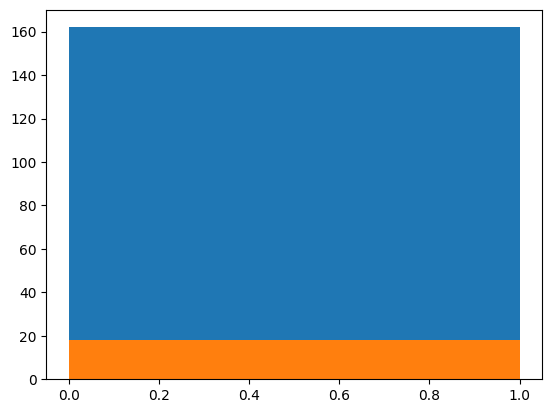

In [ ]:
# Проверка сбалансированности выборок по классам
plt.hist(np.argmax(y_train, axis=1), CLASS_COUNT)
plt.hist(np.argmax(y_val, axis=1), CLASS_COUNT)
plt.show()

In [ ]:
# Функция сборки и обучения классификатора на полносвязных слоях

def create_train_classifier(in_shape,      # форма входных данных модели
                            epochs=200,    # количество эпох обучения
                            batch_size=20  # размер батча
                            ):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=in_shape))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(CLASS_COUNT, activation='softmax'))

    # Компиляция модели
    model.compile(optimizer=Adam(lr=1e-4),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    model.summary()

    # Обучение модели
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графика точности распознавания на обучающей и проверочной выборках
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['accuracy'], label='Точность на обучающем наборе')
    plt.plot(history.history['val_accuracy'], label='Точность на проверочном наборе')
    plt.xticks(range(0, epochs, 10))
    plt.xlabel('Эпоха')
    plt.ylabel('Точность')
    plt.legend()
    plt.show()

    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               9728      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                       

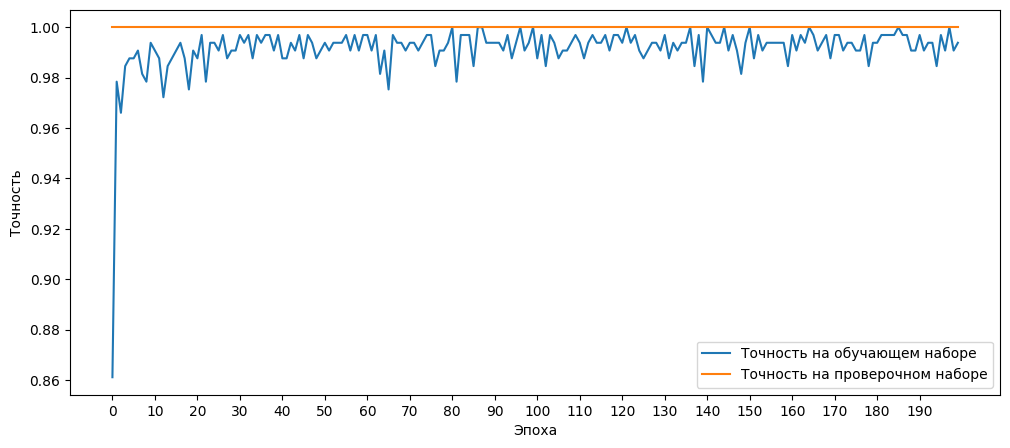

In [ ]:
model = create_train_classifier(x_train.shape[1:])